# Caltech 101 dataset object classification

This is a simple play with the caltech101 dataset.

Loading and splitting data and running some CNN networks.

Code based on:
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb

In [1]:
import os, shutil

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import cv2
from matplotlib import pyplot as plt

import keras
print("keras version: ", keras.__version__)

import tensorflow as tf
print("tensoflow version: ", tf.__version__)

/home/tbontz2s/anaconda3_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


keras version:  2.2.2
tensoflow version:  1.9.0


In [2]:
# instructions from: https://michaelblogscode.wordpress.com/2017/10/10/reducing-and-profiling-gpu-memory-usage-in-keras-with-tensorflow-backend/

# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 0.5
 
# Create a session with the above options specified.
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [3]:
dataset_path = './101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(dataset_path))]

print(len(folder_names)) # 102 = 101 categories + background

102


# Plotting

We have the folder/classes names. Now lets load some example images.

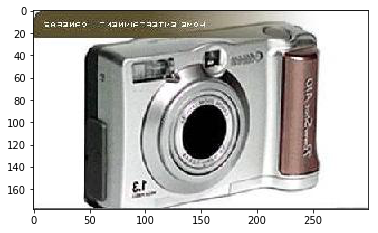

In [4]:
image_path = dataset_path + '/camera/image_0002.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

In [5]:
print(image.shape)

(178, 300, 3)


In [6]:
# One row per class category. Select categories randomly.
categories_num = 9
images_number = 9 # images per class shown
categories_selected = np.random.randint(0, 101, categories_num, dtype='l')

# print categories selected
print('Selected categories:')
print([folder_names[i] for i in categories_selected])

Selected categories:
['binocular', 'bonsai', 'scissors', 'hawksbill', 'chandelier', 'rooster', 'dolphin', 'barrel', 'pagoda']


/home/tbontz2s/anaconda3_env/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


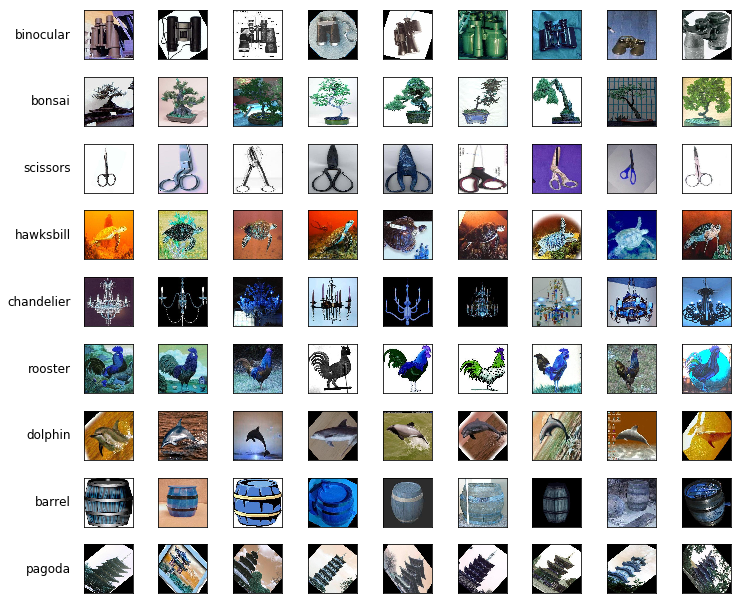

In [7]:
fig, ax = plt.subplots(nrows=9, ncols=9)
fig.set_size_inches(9.5, 8.5)

#plt.subplots_adjust(top=0.85) # to include title on TOP of figure. Otherwise it overlaps due to tight_layout

fig.subplots_adjust(wspace=0.1,hspace=0.1)

for i, category in enumerate(categories_selected):
    folder_path = dataset_path + '/' + folder_names[category]
    # take the first objects
    image_names = [img for img in sorted(os.listdir(folder_path))][:images_number]
    
    for j, image_name in enumerate(image_names):
        image_path = folder_path + '/' + image_name
        image = cv2.imread(image_path)
        # resize to 100x100 for all images for this plot
        image = cv2.resize(image, (100, 100)) 
        #plt.figure()
        #plt.imshow(image)
        ax[i,j].imshow(image)
        #ax[i,j].set_axis_off()
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        if j == 0:
            pad = 5 # in points
            #ax[i,j].set_ylabel(folder_names[category], rotation=0, size='large')
            ax[i,j].annotate(folder_names[category], xy=(0, 0.5), xytext=(-ax[i,j].yaxis.labelpad - pad, 0),
                xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
fig.tight_layout()
#plt.axis('off')
fig.show()

# Images count

Check how many images for each category there are. Create various useful dictionaries

In [8]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i, category in enumerate(folder_names):
    category_dict[i] = category
    
    folder_path = dataset_path + '/' + category
    #image_names = [os.path.join(folder_path, img) for img in sorted(os.listdir(folder_path))]
    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names
    
    print('%s: %d' %(category, images_per_category_dict[i]))
    total_images += images_per_category_dict[i]
    
print('Total images in dataset: %d' %(total_images))

BACKGROUND_Google: 468
Faces: 435
Faces_easy: 435
Leopards: 200
Motorbikes: 798
accordion: 55
airplanes: 800
anchor: 42
ant: 42
barrel: 47
bass: 54
beaver: 46
binocular: 33
bonsai: 128
brain: 98
brontosaurus: 43
buddha: 85
butterfly: 91
camera: 50
cannon: 43
car_side: 123
ceiling_fan: 47
cellphone: 59
chair: 62
chandelier: 107
cougar_body: 47
cougar_face: 69
crab: 73
crayfish: 70
crocodile: 50
crocodile_head: 51
cup: 57
dalmatian: 67
dollar_bill: 52
dolphin: 65
dragonfly: 68
electric_guitar: 75
elephant: 64
emu: 53
euphonium: 64
ewer: 85
ferry: 67
flamingo: 67
flamingo_head: 45
garfield: 34
gerenuk: 34
gramophone: 51
grand_piano: 99
hawksbill: 100
headphone: 42
hedgehog: 54
helicopter: 88
ibis: 80
inline_skate: 31
joshua_tree: 64
kangaroo: 86
ketch: 114
lamp: 61
laptop: 81
llama: 78
lobster: 41
lotus: 66
mandolin: 43
mayfly: 40
menorah: 87
metronome: 32
minaret: 76
nautilus: 55
octopus: 35
okapi: 39
pagoda: 47
panda: 38
pigeon: 45
pizza: 53
platypus: 34
pyramid: 57
revolver: 82
rhino: 

# split dataset into train validation and test

use 70% of the images for training, 20% for validation and 10% for testing

In [9]:
# directories to use. Run the other cells ONLY ONCE to create the splitting

base_path = './split_dataset'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

In [78]:
# create the directories to use
base_path = './split_dataset'
os.mkdir(base_path)

train_dir = os.path.join(base_path, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_path, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_path, 'test')
os.mkdir(test_dir)

In [79]:
# create the categories files in each

for directory in [train_dir, validation_dir, test_dir]:
    for category in folder_names:
        os.mkdir(os.path.join(directory, category))

In [80]:
# calculate the number of images to place in each train/valid/test categories folder

total_train = 0
total_validation = 0
total_test = 0

total_train_2 = 0
total_validation_2 = 0
total_test_2 = 0

for i, category in enumerate(folder_names):
    train_number = int(0.7 * images_per_category_dict[i])
    validation_number = int(0.2 * images_per_category_dict[i])
    test_number = images_per_category_dict[i] - train_number - validation_number # for not exceeding maximum number
    
    # for statistics later
    total_train += train_number
    total_validation += validation_number
    total_test += test_number
    
    # now copy these images to respective folders
    # Copy first 1000 cat images to train_cats_dir
    fnames = category_images_path_dict[i][:train_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(train_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_train_2 += len(fnames)
        
    fnames = category_images_path_dict[i][train_number:train_number + validation_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(validation_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_validation_2 += len(fnames)
    
    fnames = category_images_path_dict[i][train_number + validation_number:]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(test_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_test_2 += len(fnames)


In [85]:
# print statistics

print('Correct train split: ', total_train == total_train_2)
print('Correct validation split: ', total_validation == total_validation_2)
print('Correct test split: ', total_test == total_test_2)
print()
print('Number of training images: ', total_train)
print('Number of validation images: ', total_validation)
print('Number of test images: ', total_test)
print()
print('Real percentage of training images: ', total_train / total_images)
print('Real percentage of validation images: ', total_validation / total_images)
print('Real percentage of test images: ', total_test / total_images)

Correct train split:  True
Correct validation split:  True
Correct test split:  True

Number of training images:  6353
Number of validation images:  1788
Number of test images:  1004

Real percentage of training images:  0.6946965554948059
Real percentage of validation images:  0.19551667577911427
Real percentage of test images:  0.10978676872607983


# Simple CNN network to learn the classes

This code is inspired/copied by the repository https://github.com/fchollet/deep-learning-with-python-notebooks that has the code from book "Deep Learning with Python".

More specifically, I am running code from the notebooks:
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb

adapted to the Caltech101 dataset. Please refer to the original Jupyter Notebooks above for further info.

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

data processing

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 6353 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 102)


fit the model

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80)

Epoch 1/30
400/400 [==============================] - 23s 58ms/step - loss: 3.6541 - acc: 0.2364 - val_loss: 2.9920 - val_acc: 0.3753
Epoch 2/30
400/400 [==============================] - 18s 46ms/step - loss: 2.5811 - acc: 0.4290 - val_loss: 2.4557 - val_acc: 0.4642
Epoch 3/30
400/400 [==============================] - 18s 45ms/step - loss: 1.9088 - acc: 0.5565 - val_loss: 2.1723 - val_acc: 0.5101
Epoch 4/30
400/400 [==============================] - 18s 46ms/step - loss: 1.4492 - acc: 0.6470 - val_loss: 2.1276 - val_acc: 0.5313
Epoch 5/30
400/400 [==============================] - 18s 45ms/step - loss: 1.0012 - acc: 0.7409 - val_loss: 2.2284 - val_acc: 0.5313
Epoch 6/30
400/400 [==============================] - 18s 45ms/step - loss: 0.6795 - acc: 0.8202 - val_loss: 2.3783 - val_acc: 0.5610
Epoch 7/30
400/400 [==============================] - 18s 45ms/step - loss: 0.4291 - acc: 0.8796 - val_loss: 2.4530 - val_acc: 0.5654
Epoch 8/30
400/400 [==============================] - 18s 45ms

save the model

In [19]:
model.save('caltech101_1.h5')

plot the accuracies

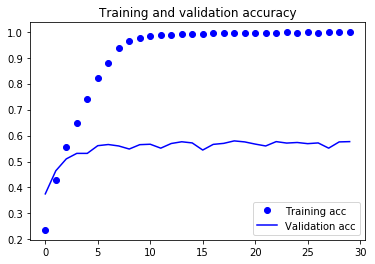

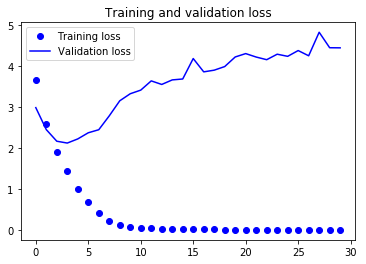

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Overfitting since approximately epoch 5.

# Using data augmentation

By augmenting data we can avoid overfitting.

In [21]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

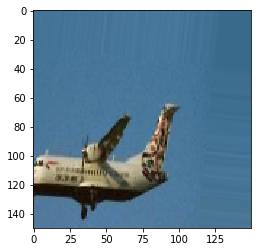

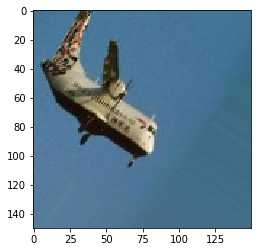

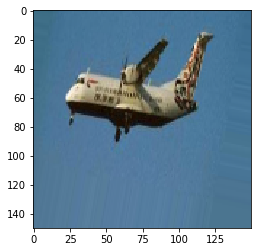

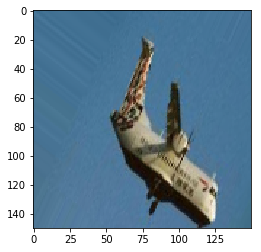

In [22]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_dir, 'airplanes', fname) for fname in os.listdir(os.path.join(train_dir, 'airplanes'))]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Use data augmentation and dropout:

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=80)

Found 6353 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
Epoch 1/100
400/400 [==============================] - 87s 217ms/step - loss: 4.0510 - acc: 0.1496 - val_loss: 3.6480 - val_acc: 0.2416
Epoch 2/100
400/400 [==============================] - 84s 211ms/step - loss: 3.5426 - acc: 0.2552 - val_loss: 3.1776 - val_acc: 0.3182
Epoch 3/100
400/400 [==============================] - 84s 211ms/step - loss: 3.2391 - acc: 0.2945 - val_loss: 2.8967 - val_acc: 0.3613
Epoch 4/100
400/400 [==============================] - 85s 212ms/step - loss: 3.0288 - acc: 0.3264 - val_loss: 2.7301 - val_acc: 0.3859
Epoch 5/100
400/400 [==============================] - 85s 212ms/step - loss: 2.8894 - acc: 0.3503 - val_loss: 2.6093 - val_acc: 0.4049
Epoch 6/100
400/400 [==============================] - 85s 211ms/step - loss: 2.7729 - acc: 0.3696 - val_loss: 2.7241 - val_acc: 0.3814
Epoch 7/100
400/400 [==============================] - 85s 213ms/step - loss: 2.6613 - acc: 0.38

In [25]:
model.save('caltech101_2.h5')

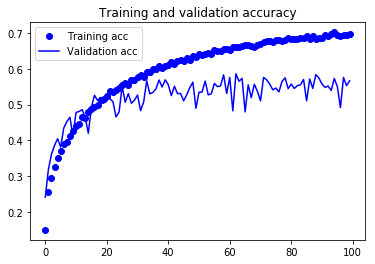

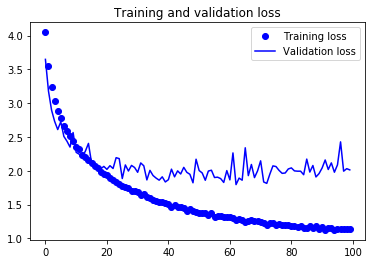

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()